# Classification of pikachu vs pichu

## reading the datafiles, 
- pikachu.txt
- pichu.txt
- test.txt
and plotting the data points in a scatterplot

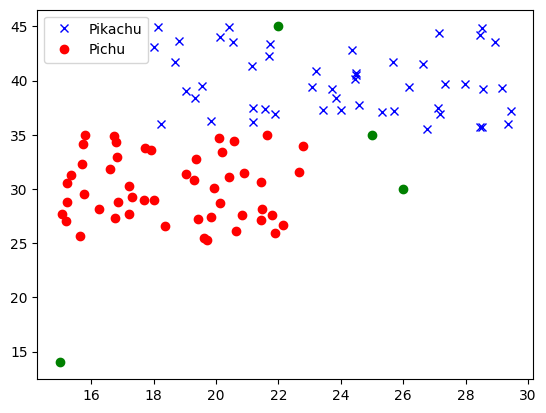

In [2]:
import matplotlib.pyplot as plt
import re

def ReadData(filename):
    file1 = open(filename, 'r')
    count = 0

    x_values = []
    y_values = []
    # header in pikachu and Pichu datafiles
    head=r'\(\s*width\s*\(\s*cm\s*\),\s*height\s*\(\s*cm\s*\)\)'
    # skip the header
    line = file1.readline()
    if re.match(head,line):
        while True:
            count += 1
        
            # Get next line from file
            line = file1.readline()
            
            # if line is empty
            # end of file is reached
            if not line:
                break
            values = line.strip('()\n').split(', ')
            x_values.append(float(values[0]))
            y_values.append(float(values[1]))
            # print("Line{}: {}".format(count, line.strip()))
        file1.close()
    else:
        while True:
            values = line.split("),")
            for tpair in values:
                myval=tpair.strip('\(\)').strip()
                # need to strip some (
                xyval=myval.strip('\()').split(',')
                x_values.append(float(xyval[0]))
                y_values.append(float(xyval[1]))
            line=file1.readline()
            if not line:
                break

        file1.close()
    return [x_values,y_values]




vect1=ReadData('Pikachu.txt')
vect2=ReadData('Pichu.txt')
vect3=ReadData('test_points.txt')
plt.figure()
plt.plot(vect1[0],vect1[1],'bx', label='Pikachu')
plt.plot(vect2[0],vect2[1], 'ro', label='Pichu')
plt.plot(vect3[0],vect3[1], 'go', label='Test')
plt.legend(("Pikachu", "Pichu"))



## Euclidian distance 
Th euclidian is calculated between the testpoints and respective category.
The resulting vectors are then sorted.

In [7]:
def euclidian(x1, y1, x2, y2):
    return ((x1-x2)**2 +(y1-y2)**2)**0.5

def CalcDist(targetvect, sourcevect):
    resultv=[]
    sortedresults=[]
    for i,x in enumerate(targetvect[0]):
        resultv.append([])
        sortedresults.append([])
        for j,y in enumerate(sourcevect[0]):
            resultv[i].append(euclidian(targetvect[0][i],targetvect[1][i],sourcevect[0][j],sourcevect[1][j]))
        sortedresults[i]=sorted(resultv[i])
    return sortedresults
   
sortedPikachu= CalcDist(vect3,vect1)
sortedPichu= CalcDist(vect3,vect2)




(1.8304663206363925, 2.439378740901436)

## Comparing the smallest distance to testpoints and predict outcome


In [8]:
for i,x in enumerate(vect3[0]):
    if sortedPikachu[i][0] < sortedPichu[i][0]:
        print(f"Sample with (width, height): ({vect3[0][i]},{vect3[1][i]}) classified as Pikachu")
    elif sortedPikachu[i][0] > sortedPichu[i][0]:
        print(f"Sample with (width, height): ({vect3[0][i]},{vect3[1][i]}) classified as Pichu")
    else:
        print(f"Sample with (width, height): ({vect3[0][i]},{vect3[1][i]}) is indeterminate")

Sample with (width, height): (25.0,35.0) classified as Pikachu
Sample with (width, height): (15.0,14.0) classified as Pichu
Sample with (width, height): (26.0,30.0) classified as Pichu
Sample with (width, height): (22.0,45.0) classified as Pikachu


## Uppgifter
Låt användaren mata in en godtycklig punkt och avgör om det är en Pikachu 
eller Pichu.